In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Función de Himmelblau

$ f(X) = (x_1^2 + x_2 - 11)^2 + (x_1+x_2^2-7)^2$

In [2]:
def f(X):
    result=((X[0]**2)+X[1]-11)**2 + (X[0]+(X[1]**2)-7)**2
    return result

## Inicialización de parámetros

In [3]:
gamma=1.5
beta=0.5
#criterio de terminación
eps=0.003
#número de variables
N = 2

## Algoritmo

In [4]:
#Punto inicial (0,0)
histMejor=[]
histQ=[]
#Simplex inicial la tercera columna es almacena el valor de la función objetivo
X = np.array([[0.0,0.0,-1.0],[2.0,0.0,-1.0],[1.0,1.0,-1.0]])

#Evaluar simplex
for i in range(N+1):
        X[i][N]=f(X[i]) #el último elemento de la fila toma el valor de f(X)
        
#Ordena el Simplex basado en el último elemento f(X) de menor a mayor
X = X[X[:, N].argsort()]

#contador de iteraciones
k = 1
#mide la distancia del simplex con respecto al centroide
Q = 50

while Q >= eps:
    print("*************** Iteración "+str(k)+"***************************")
        
    print(">>Simplex actual")
    print(X)
    
    fxl = X[0][N]   #el mejor esta en la posición cero
    fxg = X[N-1][N] #el segundo peor está en la posición n-1
    fxh = X[N][N]   #el peor está en la posición n
    
    xl = X[0][0:N]   # obtengo el mejor
    xg = X[N-1][0:N] # obtengo el segundo peor
    xh = X[N][0:N]   # obtengo el peor
    
    #Calcula centroide
    xc = (xl+xg)/N
    fxc = f(xc)
    print("xc "+str(xc)+" --> "+str(fxc))

    #Calcula el punto de reflección
    xr = 2*xc-xh
    fxr = f(xr)
    print("xr "+str(xr)+" --> "+str(fxr))
    
    #Asigna el valor de la reflección a x_new
    x_new = xr
    
    if fxr < fxl:
        x_new = (1+gamma)*xc - (gamma*xh) #expansión
    elif fxr >= fxh:
        x_new = (1-beta)*xc + (beta*xh) #contracción
    elif fxg < fxr < fxh:
        x_new = (1+beta)*xc - (beta*xh) #contracción
    
    fx_new = f(x_new)
    print("x_new "+str(x_new)+" --->"+str(fx_new))
   
    #Reemplazar el peor del simplex
    for j in range(N):
        X[N][j] = x_new[j]
    X[N][N] = fx_new
    
    #incrementa el contador de iteraciones
    k = k+1
    
    #Calcular el valor de Q
    suma = 0
    for i in range(N+1):
        suma += ((X[i][N]-fxc)**2)/(N+1)
    Q = np.sqrt(suma)
    
    print("Q = "+str(Q))
    
    #ordena el simplex actual de acuerdo al valor de la función objetivo
    X = X[X[:, N].argsort()] 
    
    histMejor.append([k,X[0][N]])
    histQ.append([k,Q])

#FIN DEL ALGORITMO 
print("***************************************************************")
print("\n>>FIN DEL ALGORITMO<<")
print("\nMejor solución encontrada\n"+str(X[0][0:N])+" --> "+str(X[0][N])+"\n")


*************** Iteración 1***************************
>>Simplex actual
[[  2.   0.  74.]
 [  1.   1. 106.]
 [  0.   0. 170.]]
xc [1.5 0.5] --> 95.625
xr [3. 1.] --> 10.0
x_new [3.75 1.25] --->21.4453125
Q = 45.01076644388413
*************** Iteración 2***************************
>>Simplex actual
[[  3.75        1.25       21.4453125]
 [  2.          0.         74.       ]
 [  1.          1.        106.       ]]
xc [2.875 0.625] --> 18.39501953125
xr [4.75 0.25] --> 144.3203125
x_new [1.9375 0.8125] --->60.771759033203125
Q = 40.40217069639398
*************** Iteración 3***************************
>>Simplex actual
[[ 3.75        1.25       21.4453125 ]
 [ 1.9375      0.8125     60.77175903]
 [ 2.          0.         74.        ]]
xc [2.84375 1.03125] --> 13.10655403137207
xr [3.6875 2.0625] --> 22.603302001953125
x_new [3.6875 2.0625] --->22.603302001953125
Q = 28.470422562614168
*************** Iteración 4***************************
>>Simplex actual
[[ 3.75        1.25       21.445312

## Convergencia

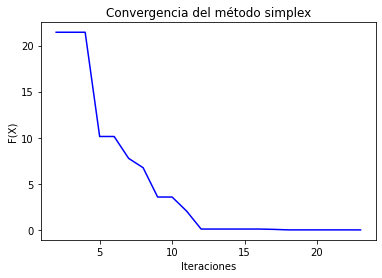

In [5]:
arr = np.array(histMejor)
plt.plot(arr[:,0],arr[:,1], c="blue") 
plt.title("Convergencia del método simplex") 
plt.xlabel("Iteraciones") 
plt.ylabel("F(X)") 
plt.show()


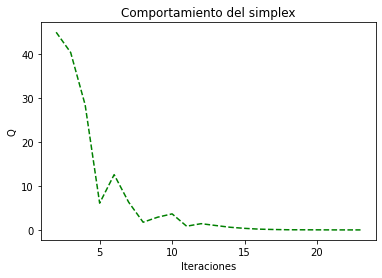

In [6]:
arrQ = np.array(histQ)
plt.plot(arrQ[:,0],arrQ[:,1], '--', c="green") 
plt.title("Comportamiento del simplex") 
plt.xlabel("Iteraciones") 
plt.ylabel("Q") 
plt.show()